<a href="https://colab.research.google.com/github/ksuemats/cellxgene/blob/main/Cohort_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scanpy
import urllib
import scanpy

urllib.request.urlretrieve('https://datasets.cellxgene.cziscience.com/5d871206-9489-4d9f-8106-94305ccb1c3a.h5ad', 'dataset.h5ad')

adata = scanpy.read_h5ad('dataset.h5ad')
print(adata)

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 54.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.0/129.0 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 6.8 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=d1404a5b134cdbe9bdb93cc9152fda6573600e63e31f8c7ed08f7065ff10b900
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info
AnnData object with n_obs × n_vars = 23197 × 33091
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'SORT', 'Amyloid', 'Age', 'RIN', 'nCount_SCT', 'nFeature_SCT', 'nCount_Exon', 'nFeatu

In [2]:
obs_attributes = adata.obs.columns.tolist()  # List of obs attributes
var_attributes = adata.var.columns.tolist()  # List of var attributes

print("Obs attributes:", obs_attributes)
print("Var attributes:", var_attributes)

Obs attributes: ['nCount_RNA', 'nFeature_RNA', 'percent.mt', 'SORT', 'Amyloid', 'Age', 'RIN', 'nCount_SCT', 'nFeature_SCT', 'nCount_Exon', 'nFeature_Exon', 'PMI', 'Braak', 'Sample.ID', 'Cell.Types', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'donor_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid']
Var attributes: ['feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type']


In [3]:
# Get gene id mapping to its name
if 'feature_name' in adata.var.columns:
    gene_ids = adata.var.index
    gene_names = adata.var['feature_name']

gene_mapping = dict(zip(gene_ids, gene_names))

print("\nMapping from gene ID to gene name (first 10 mappings):")
for gene_id, gene_name in list(gene_mapping.items())[:10]:
    print(f"Gene ID: {gene_id}, Gene Name: {gene_name}")


Mapping from gene ID to gene name (first 10 mappings):
Gene ID: ENSG00000278915, Gene Name: ENSG00000278915.1
Gene ID: ENSG00000168454, Gene Name: TXNDC2
Gene ID: ENSG00000139180, Gene Name: NDUFA9
Gene ID: ENSG00000229177, Gene Name: ENSG00000229177.1
Gene ID: ENSG00000204564, Gene Name: C6orf136
Gene ID: ENSG00000116717, Gene Name: GADD45A
Gene ID: ENSG00000254418, Gene Name: SPON1-AS1
Gene ID: ENSG00000114654, Gene Name: EFCC1
Gene ID: ENSG00000257894, Gene Name: ENSG00000257894.2
Gene ID: ENSG00000198398, Gene Name: TMEM207


In [4]:
# Extract and display the values under each attribute in obs
for obs_attr in adata.obs.columns:
    print(f"\nValues for obs attribute '{obs_attr}':")
    print(adata.obs[obs_attr].values)

# Extract and display the values under each attribute in var
for var_attr in adata.var.columns:
    print(f"\nValues for var attribute '{var_attr}':")
    print(adata.var[var_attr].values)


Values for obs attribute 'nCount_RNA':
[ 927. 1251. 2972. ... 5511. 9837. 6275.]

Values for obs attribute 'nFeature_RNA':
[ 694  886 1695 ... 2269 3440 2510]

Values for obs attribute 'percent.mt':
[1.83387271 6.47482014 0.20188425 ... 6.06060606 3.15136729 1.56175299]

Values for obs attribute 'SORT':
['MAP2', 'MAP2', 'MAP2', 'MAP2', 'MAP2', ..., 'MAP2control', 'MAP2control', 'MAP2control', 'MAP2control', 'MAP2control']
Length: 23197
Categories (3, object): ['AT8', 'MAP2', 'MAP2control']

Values for obs attribute 'Amyloid':
['C3', 'C3', 'C3', 'C3', 'C3', ..., 'No', 'No', 'No', 'No', 'No']
Length: 23197
Categories (3, object): ['C3', 'DP (C0)', 'No']

Values for obs attribute 'Age':
['73', '73', '73', '73', '73', ..., '71', '71', '71', '71', '71']
Length: 23197
Categories (14, object): ['57', '61', '62', '66', ..., '81', '87', '89', '93']

Values for obs attribute 'RIN':
['5.7', '5.7', '5.7', '5.7', '5.7', ..., '6.5', '6.5', '6.5', '6.5', '6.5']
Length: 23197
Categories (10, object):

In [5]:
# Filter the annData to only include female subjects for sex attribute
adata_slice_female = adata[adata.obs['sex'] == 'female', :]
print(adata_slice_female)

# Filter the annData to only include TXNDC2 and NDUFA9 genes
genes_of_interest = ['SLC26A3', 'RASGEF1B', 'LING01', 'PDE4DIP', 'LINC01609', 'PHYHIP']
adata_slice_genes = adata[:,adata.var['feature_name'].isin(genes_of_interest)]
print(adata_slice_genes)

View of AnnData object with n_obs × n_vars = 9525 × 33091
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'SORT', 'Amyloid', 'Age', 'RIN', 'nCount_SCT', 'nFeature_SCT', 'nCount_Exon', 'nFeature_Exon', 'PMI', 'Braak', 'Sample.ID', 'Cell.Types', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'donor_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'citation', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_pca', 'X_umap'
View of AnnData object with n_obs × n_vars = 23197 × 5
    obs: 'nCount_RNA', 'nFeature_RNA',

['Alzheimer disease', 'normal']
Categories (2, object): ['Alzheimer disease', 'normal']


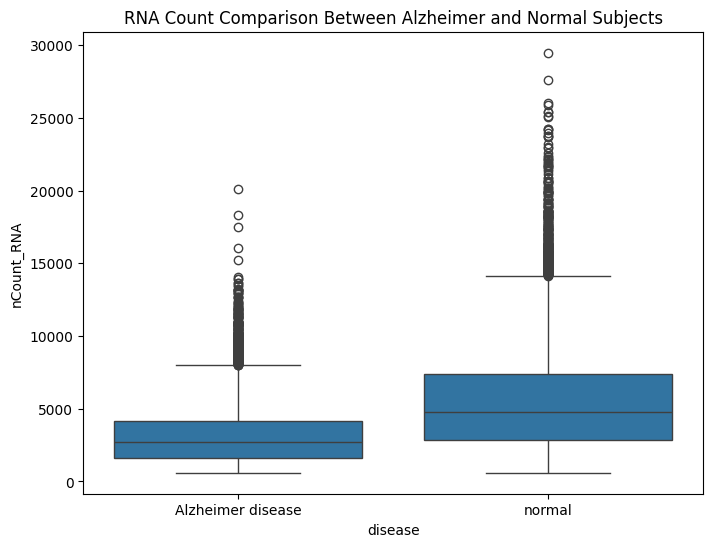

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the unique values in the 'disease' column
print(adata.obs['disease'].unique())

# Compare total RNA counts (nCount_RNA) between the groups
plt.figure(figsize=(8, 6))
sns.boxplot(x='disease', y='nCount_RNA', data=adata.obs)
plt.title("RNA Count Comparison Between Alzheimer and Normal Subjects")
plt.show()

['female', 'male']
Categories (2, object): ['female', 'male']


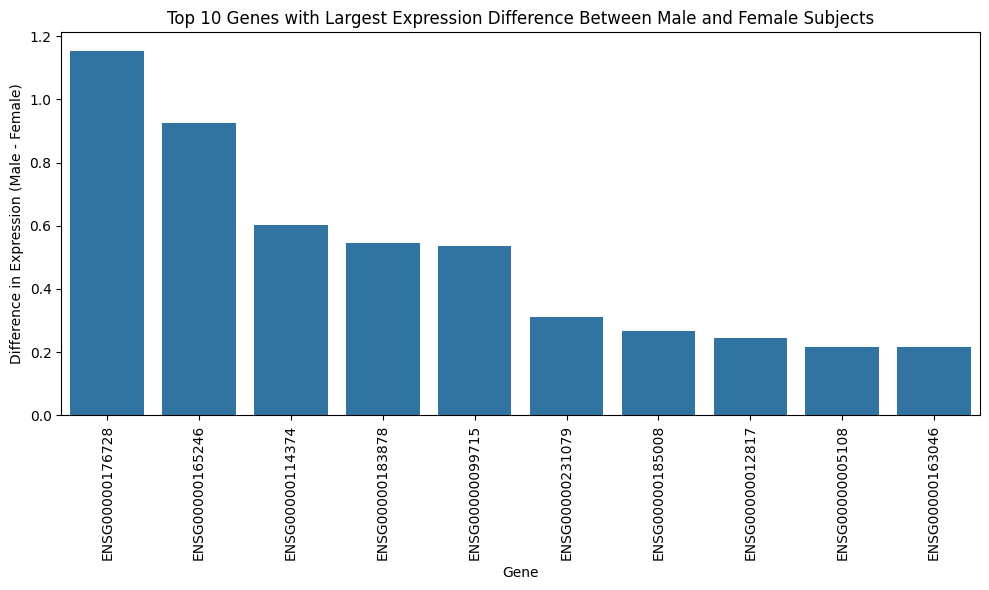

In [7]:
import pandas as pd

# Check the unique values in the 'sex' column
print(adata.obs['sex'].unique())

# Filter the dataset to focus on subjects categorized by 'sex'
male_group = adata[adata.obs['sex'] == 'male']
female_group = adata[adata.obs['sex'] == 'female']
male_counts = male_group.X.mean(axis=0)
female_counts = female_group.X.mean(axis=0)

# Create a DataFrame to store gene expression for easier comparison
genes = adata.var.index
gene_expression_comparison = pd.DataFrame({
    'Gene': genes,
    'Male': male_counts.A1 if hasattr(male_counts, "A1") else male_counts,
    'Female': female_counts.A1 if hasattr(female_counts, "A1") else female_counts
})

# Calculate the difference between male and female expression
gene_expression_comparison['Difference'] = gene_expression_comparison['Male'] - gene_expression_comparison['Female']
gene_expression_comparison_sorted = gene_expression_comparison.sort_values(by='Difference', ascending=False)

# Plot the top 10 genes with the largest difference in expression
top_genes = gene_expression_comparison_sorted.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Gene', y='Difference', data=top_genes)
plt.title('Top 10 Genes with Largest Expression Difference Between Male and Female Subjects')
plt.xticks(rotation=90)
plt.ylabel('Difference in Expression (Male - Female)')
plt.tight_layout()
plt.show()

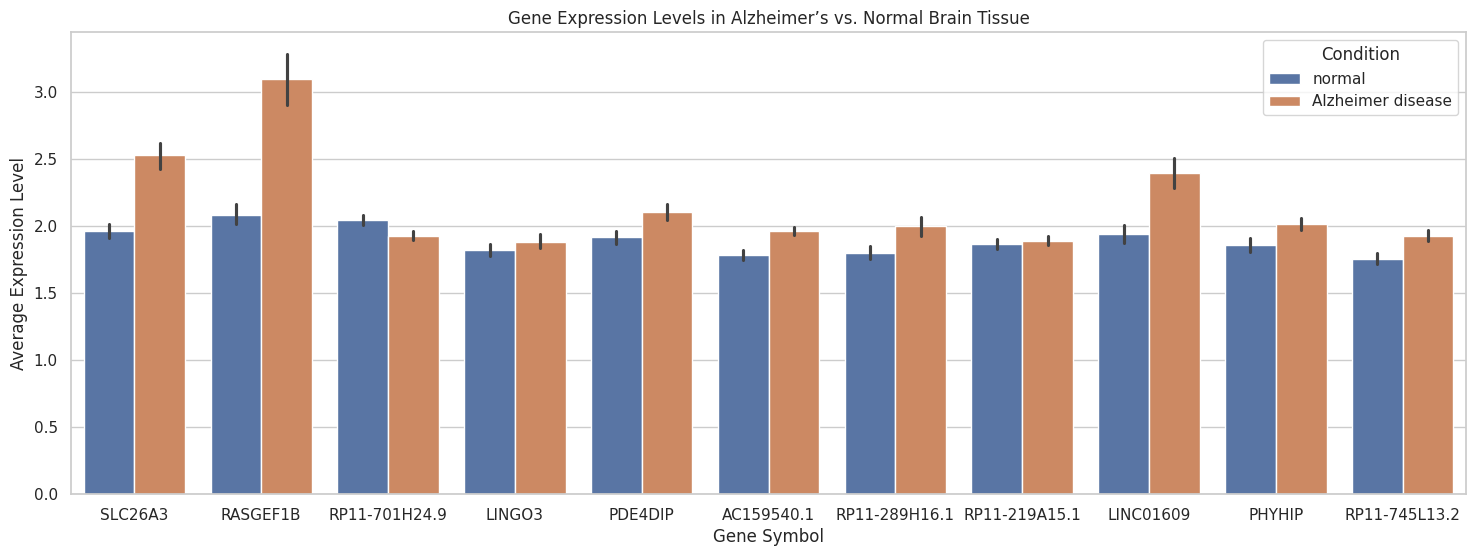

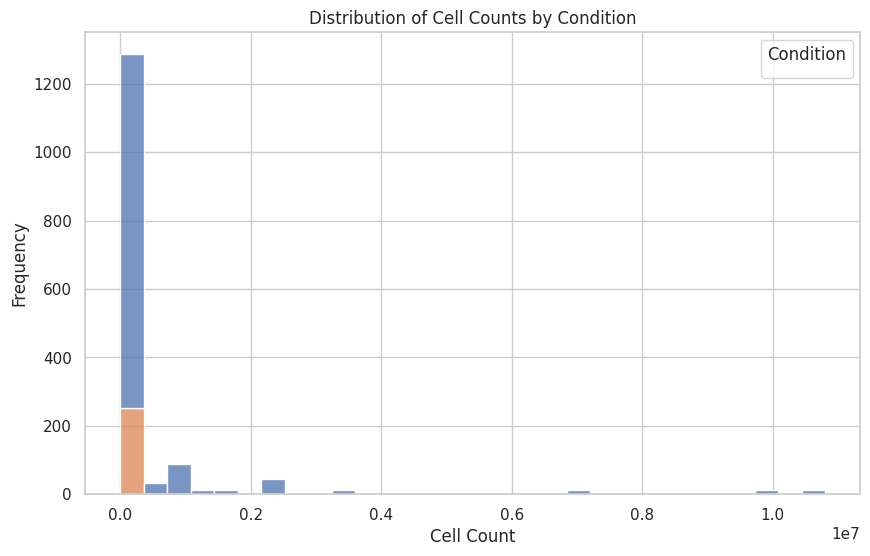

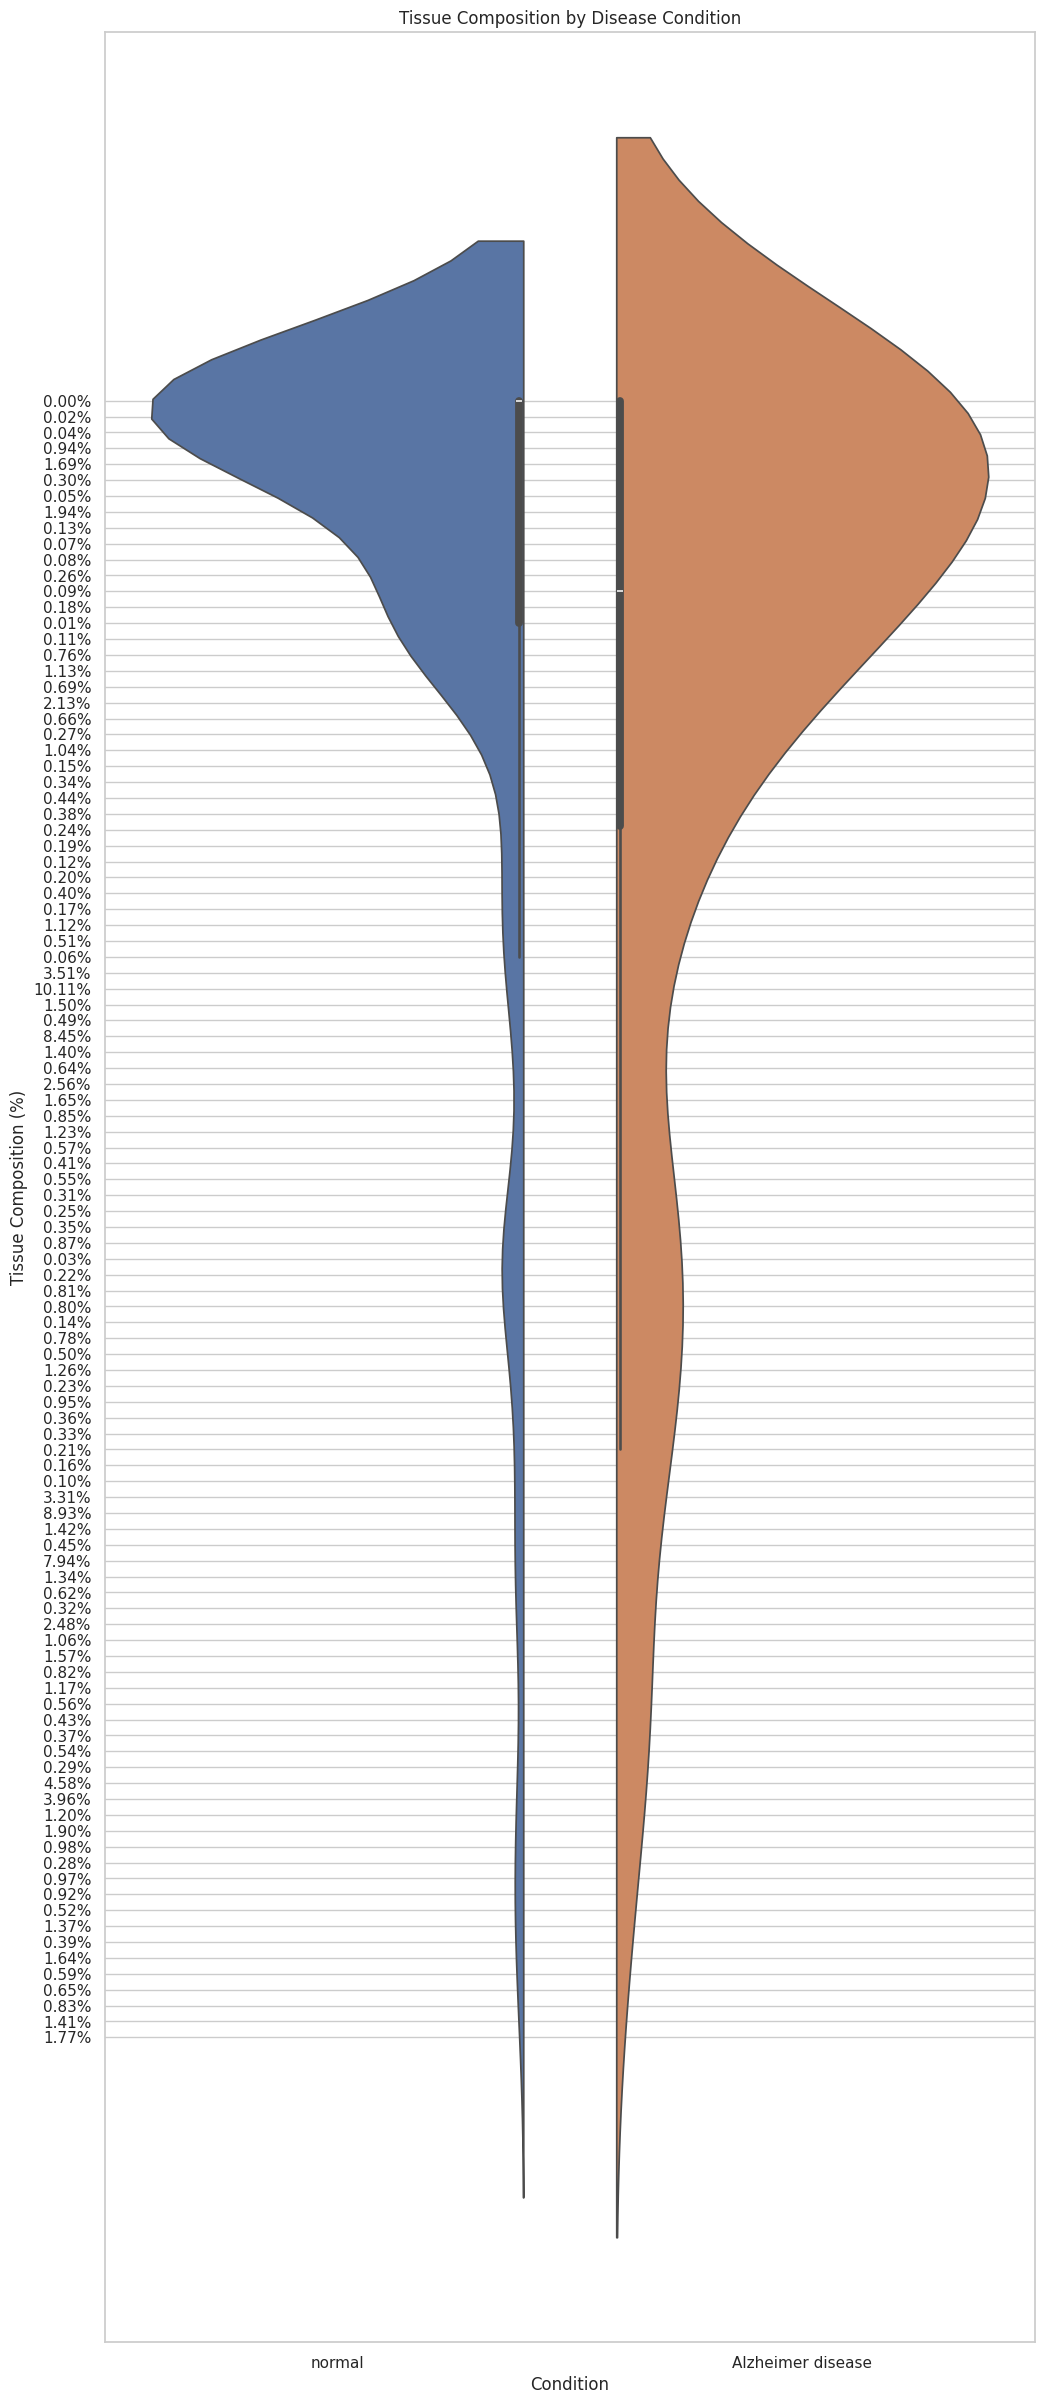

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset (outputted from Alteryx)
data = pd.read_csv('/cellxgene_disease_edited.csv')

# Set the style for seaborn
sns.set(style="whitegrid")

# 1. Gene Expression Levels in Alzheimer’s vs. Normal Brain Tissue
plt.figure(figsize=(18, 6))
sns.barplot(data=data, x='Gene Symbol', y='Expression', hue='Disease')
plt.title("Gene Expression Levels in Alzheimer’s vs. Normal Brain Tissue")
plt.xlabel("Gene Symbol")
plt.ylabel("Average Expression Level")
plt.legend(title="Condition")
plt.show()

# 2. Distribution of Cell Counts by Condition
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Cell Count', hue='Disease', multiple='stack', bins=30)
plt.title("Distribution of Cell Counts by Condition")
plt.xlabel("Cell Count")
plt.ylabel("Frequency")
plt.legend(title="Condition")
plt.show()

# 3. Tissue Composition by Disease Condition
plt.figure(figsize=(12, 30))
sns.violinplot(data=data, x='Disease', y='Tissue Composition', hue='Disease', split=True)
plt.title("Tissue Composition by Disease Condition")
plt.xlabel("Condition")
plt.ylabel("Tissue Composition (%)")
plt.show()


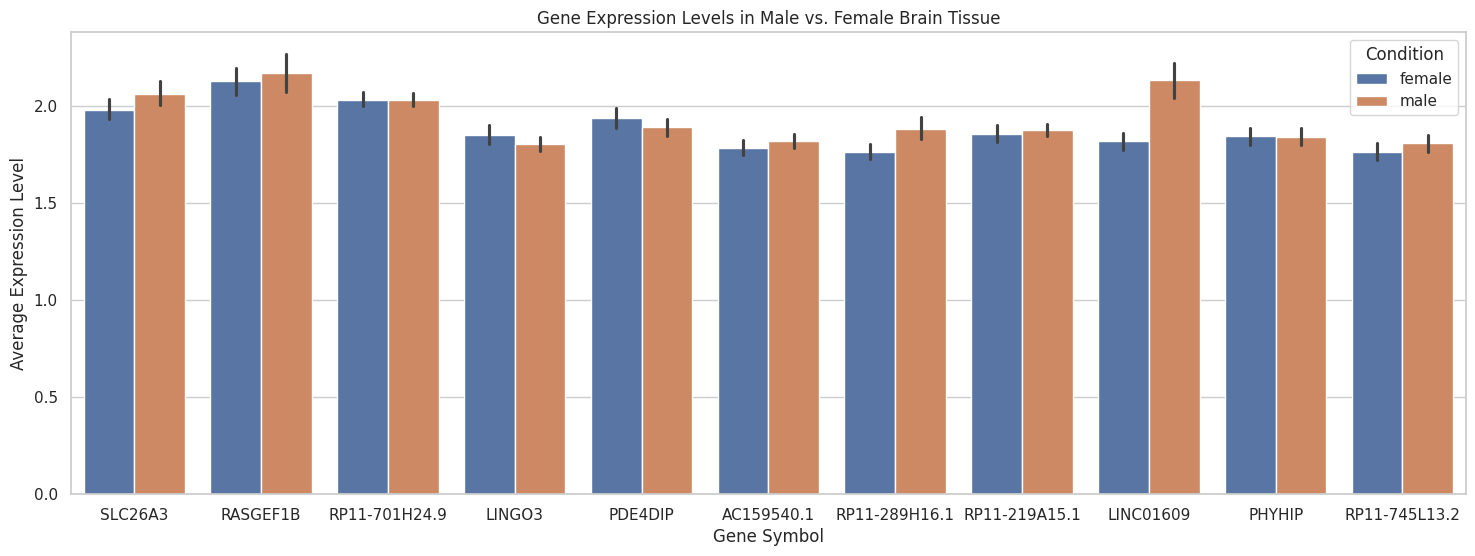

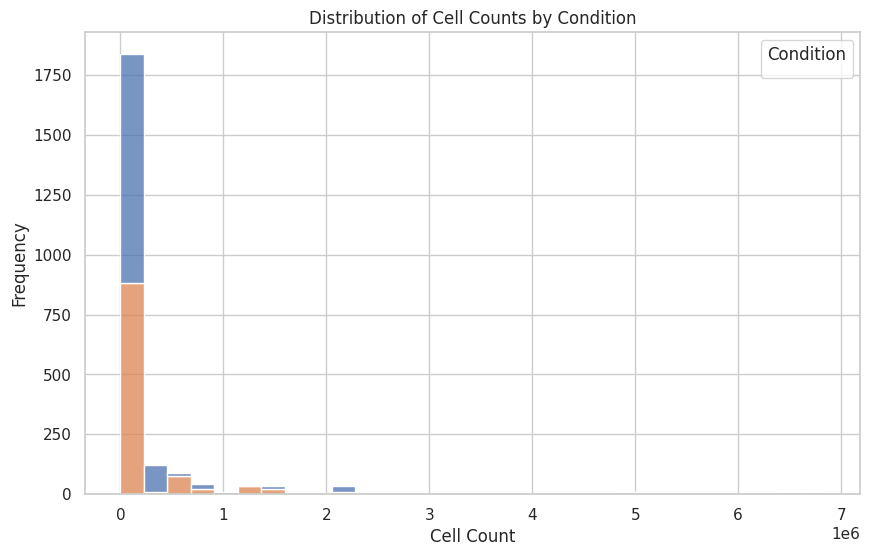

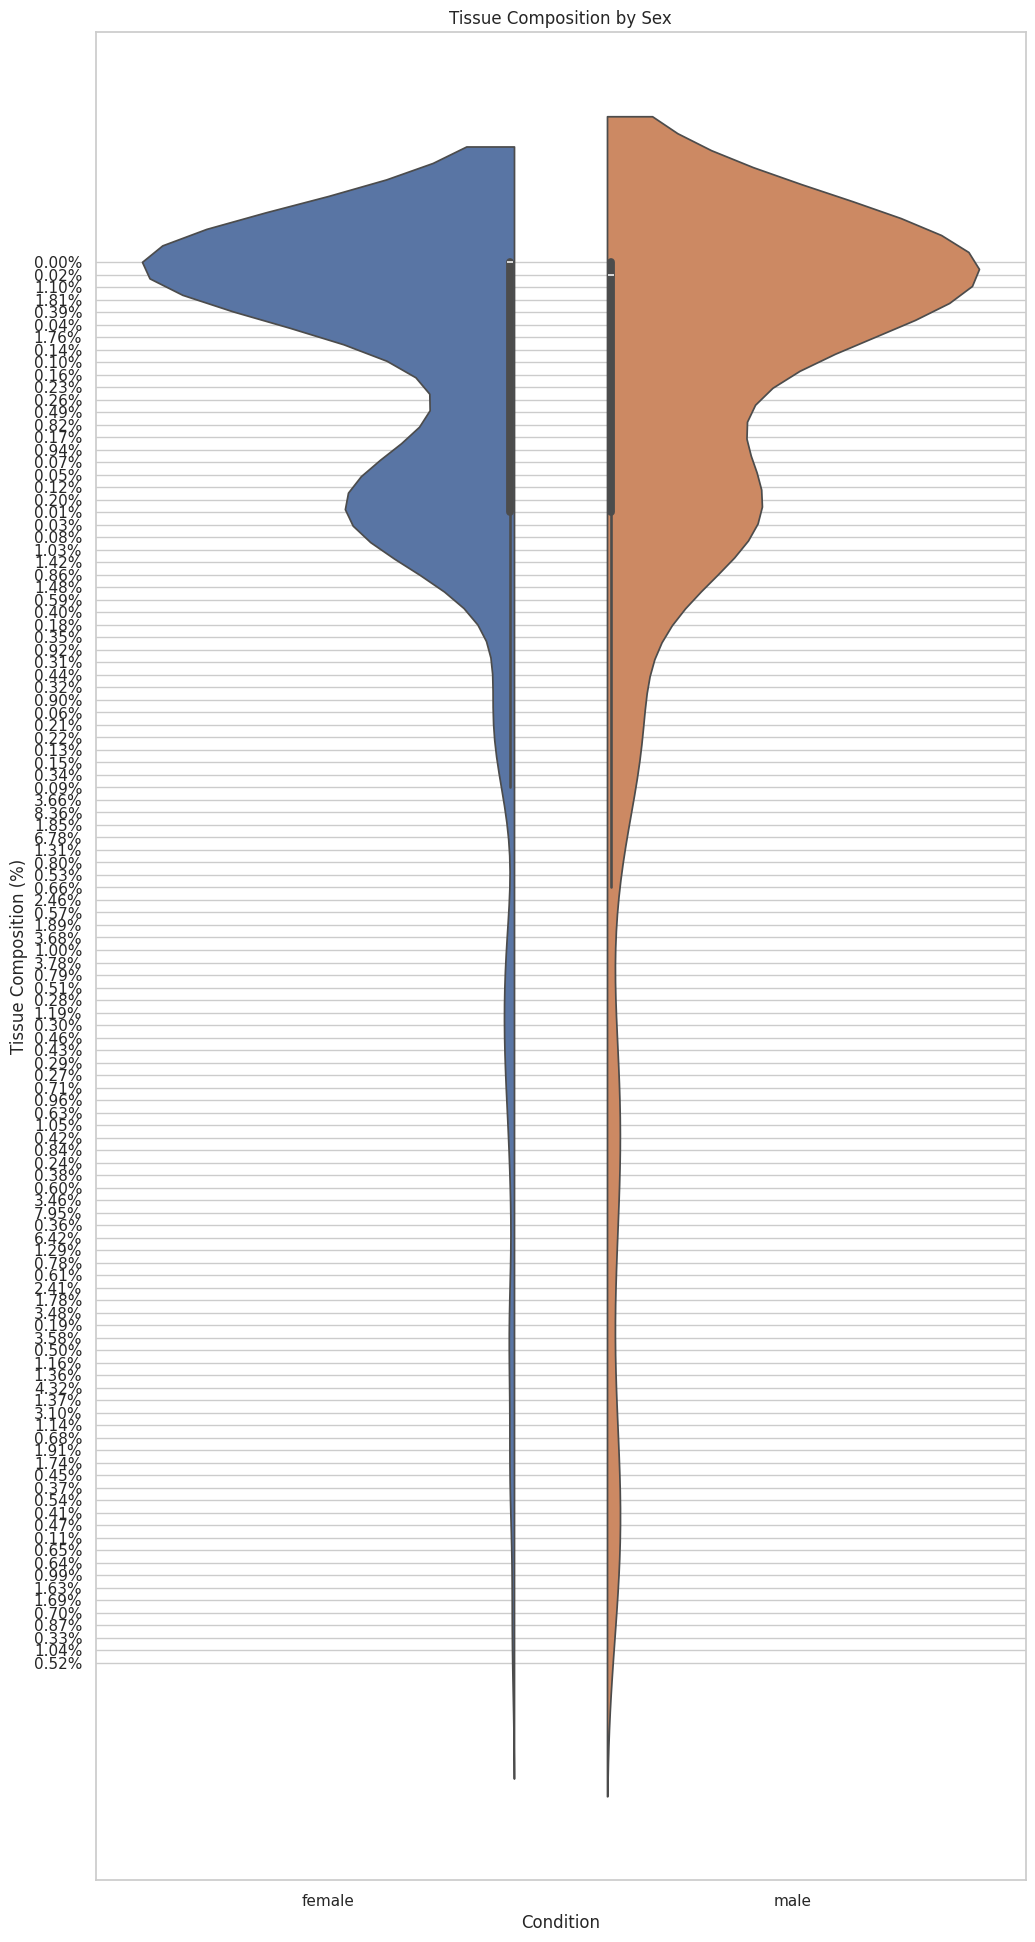

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
# Note: Replace 'your_data.csv' with the actual path to your CSV file.
data = pd.read_csv('/cellxgene_sex_edited.csv')

# Set the style for seaborn
sns.set(style="whitegrid")

# 1. Gene Expression Levels in Male vs. Female Brain Tissue
plt.figure(figsize=(18, 6))
sns.barplot(data=data, x='Gene Symbol', y='Expression', hue='Sex')
plt.title("Gene Expression Levels in Male vs. Female Brain Tissue")
plt.xlabel("Gene Symbol")
plt.ylabel("Average Expression Level")
plt.legend(title="Condition")
plt.show()

# 2. Distribution of Cell Counts by Condition
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Cell Count', hue='Sex', multiple='stack', bins=30)
plt.title("Distribution of Cell Counts by Condition")
plt.xlabel("Cell Count")
plt.ylabel("Frequency")
plt.legend(title="Condition")
plt.show()

# 3. Tissue Composition by Sex
plt.figure(figsize=(12, 30))
sns.violinplot(data=data, x='Sex', y='Tissue Composition', hue='Sex', split=True)
plt.title("Tissue Composition by Sex")
plt.xlabel("Condition")
plt.ylabel("Tissue Composition (%)")
plt.show()
